<a href="https://colab.research.google.com/github/ankitaggarwal64/Agricultural-Equipment-Sales-Forecasting/blob/main/Data_Understanding(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Undestanding - Data Exploration and Visualisation :**
In this notebook, Following will be done:


*   Treatment of variables and missing values
*   Exploration of Indices
*   Exploration of Sales data







In [54]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
#import sales and indices combined data
combined_sales_ind = pd.read_csv("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Output_files/combined_sales_ind.csv",parse_dates=['Time'], index_col='Time')

# displaying data
display(combined_sales_ind)

#Size of data - Sales and 25 Indices
print(combined_sales_ind.shape)

,Sales,livestock1,livestock2,livestock3,livestock4,livestock5,livestock6,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCSPOT.D7,STRTXOK.D7,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,2.69,402.53,396.76,429.99,3.71,NaN,84.9,93.3,NaN,NaN,NaN,NaN,NaN,15.5,NaN,79.06,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,2.70,392.28,386.30,412.67,3.56,NaN,85.7,95.2,NaN,NaN,NaN,NaN,NaN,14.5,NaN,79.04,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,2.72,387.13,377.33,403.26,3.48,NaN,87.5,96.7,NaN,NaN,NaN,NaN,NaN,13.9,NaN,79.16,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,3.01,383.06,367.06,412.49,3.49,NaN,95.0,103.0,NaN,NaN,NaN,NaN,NaN,13.4,NaN,79.89,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,3.08,371.44,365.44,389.52,3.40,NaN,96.0,104.0,NaN,NaN,NaN,NaN,NaN,13.5,NaN,78.28,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,102,0.80,116.55,116.91,151.20,48.12,47.38,323.04,307.93,3.21,3.82,398.89,407.10,414.74,3.67,4.06,131.0,138.0,0.28,0.86,15.21,16.30,14.65,17.2,0.80,116.55,65.86,2192.5,1164.0,16727.0,4.9,3.50,2.40,3.44,6.70,101.8
2016-09-30,200,0.78,106.08,106.22,138.38,43.36,42.83,328.90,320.25,3.22,3.78,375.02,390.98,424.61,3.49,4.10,129.0,137.0,0.30,0.88,14.66,16.39,14.25,17.4,0.78,106.08,65.86,2192.5,1052.0,16727.0,4.9,3.50,2.41,3.46,6.73,103.5
2016-10-31,611,0.71,100.37,101.76,121.82,37.07,30.84,349.49,326.23,3.29,3.88,381.28,408.77,440.15,3.68,4.14,131.0,135.0,0.33,0.92,14.09,14.82,13.66,16.7,0.71,100.37,65.86,2197.2,1320.0,16813.3,4.8,3.50,2.42,3.47,6.74,100.8


(324, 36)


For understanding the indices provided, we will look at the description of the names of indices name provided in dictionary file

In [56]:
# import dictionary file
Indices_description = pd.ExcelFile("/content/drive/My Drive/1. Data Science/Sales Forecasting_Masters Project/Masters Project/Data/Raw Data/Dictionary.xlsx")

# Looking at the sheets avaialble in excel file
print(Indices_description.sheet_names) 

['Dictionary']


In [57]:
# Creating a dictionary of sheets in workbook
Indices_dict = {sheet: Indices_description.parse(sheet) for sheet in Indices_description.sheet_names}

In [58]:
# Extracting the Dictionary sheet from the workbook
Indices_desc = Indices_dict['Dictionary']
print(type(Indices_desc))
print(Indices_desc.shape)
display(Indices_desc)

<class 'pandas.core.frame.DataFrame'>
(35, 3)


,Indices_Name,Description,Indices_type
0,livestock1,"Broilers, Composite Average, Spot Price - Unit...",Commodity Prices
1,livestock2,"Live FOB Basis, Beef Breeds, Steers, 65% to 80...",Commodity Prices
2,livestock3,"Cattle Prices, Steers, Choice, 11-13 Centum We...",Commodity Prices
3,livestock4,"Feeder Cattle, Steers, Medium No. 1, 600-650 ...",Commodity Prices
4,livestock5,"Hog Prices, Barrows and Gilts, 6 Markets ($/CWT)",Commodity Prices
5,livestock6,"Hog Prices, Sows, No. 1-3 - Iowa/South Minneso...",Commodity Prices
6,corn1,"Corn Futures, 1st Expiration Nearby, Settlemen...",Commodity Prices
7,corn2,North Central and South Central Illinois Corn ...,Commodity Prices
8,corn3,"Producer Prices Received, Field Crops, Corn ($...",Commodity Prices
9,corn4,"Corn, No. 2 Yellow, Gulf Ports, US ($/bu)",Commodity Prices


**Observations from Indices description:**

1.   There are two types of indices - Commodity prices(25) and Economic Indices(10)
2.   Some of names of the commodity prices indices are too general or too specific, therefore those can be changed for out better analysis. 



In [59]:
# Creating a dictionary for new column names
new_column_names = {"livestock1" : "livestock1_broilers","livestock2" : "livestock2_beef_steers",
                   "livestock3" : "livestock3_steers","livestock4" : "livestock4_steers","livestock5" : "livestock5_hog",
                   "livestock6" : "livestock6_hog","BRLCSPOT.D7" : "BRLCS_broilers","STRTXOK.D7" : "STRTXOK_beef_steers" }

# Rename Columns
clean_combined_sales_ind = combined_sales_ind.rename(columns = new_column_names)
display(clean_combined_sales_ind.head())

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-31,505,NaN,79.06,NaN,NaN,NaN,NaN,239.83,229.41,2.31,2.69,402.53,396.76,429.99,3.71,NaN,84.9,93.3,NaN,NaN,NaN,NaN,NaN,15.5,NaN,79.06,46.26,NaN,1551.0,8947.1,5.4,10.11,1.28,9.90,5.42,106.5
1990-02-28,467,NaN,79.04,NaN,NaN,NaN,NaN,241.59,234.97,2.32,2.70,392.28,386.30,412.67,3.56,NaN,85.7,95.2,NaN,NaN,NaN,NaN,NaN,14.5,NaN,79.04,46.26,NaN,1437.0,8947.1,5.3,10.00,1.28,10.20,5.42,106.7
1990-03-31,467,NaN,79.16,NaN,NaN,NaN,NaN,250.58,244.68,2.37,2.72,387.13,377.33,403.26,3.48,NaN,87.5,96.7,NaN,NaN,NaN,NaN,NaN,13.9,NaN,79.16,46.26,NaN,1289.0,8947.1,5.2,10.00,1.29,10.27,5.39,110.6
1990-04-30,593,NaN,79.89,NaN,NaN,NaN,NaN,273.49,263.98,2.51,3.01,383.06,367.06,412.49,3.49,NaN,95.0,103.0,NaN,NaN,NaN,NaN,NaN,13.4,NaN,79.89,46.26,NaN,1248.0,8981.7,5.4,10.00,1.29,10.37,5.36,107.3
1990-05-31,866,NaN,78.28,NaN,NaN,NaN,NaN,284.34,273.86,2.62,3.08,371.44,365.44,389.52,3.40,NaN,96.0,104.0,NaN,NaN,NaN,NaN,NaN,13.5,NaN,78.28,46.26,NaN,1212.0,8981.7,5.4,10.00,1.29,10.48,5.32,107.3


In [60]:
#Checking datatypes
clean_combined_sales_ind.dtypes

Sales                       int64
livestock1_broilers       float64
livestock2_beef_steers    float64
livestock3_steers         float64
livestock4_steers         float64
livestock5_hog            float64
livestock6_hog            float64
corn1                     float64
corn2                     float64
corn3                     float64
corn4                     float64
wheat1                    float64
wheat2                    float64
wheat3                    float64
wheat4                    float64
wheat5                    float64
hay1                      float64
hay2                      float64
dairy1                    float64
dairy2                    float64
dairy3                    float64
dairy4                    float64
dairy5                    float64
dairy6                    float64
BRLCS_broilers            float64
STRTXOK_beef_steers       float64
FarmIncome                float64
Non-ResidentialInvest     float64
HOUST                     float64
RealGDP       

In [61]:
#Checking summary statistics
clean_combined_sales_ind.describe()

,Sales,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,corn1,corn2,corn3,corn4,wheat1,wheat2,wheat3,wheat4,wheat5,hay1,hay2,dairy1,dairy2,dairy3,dairy4,dairy5,dairy6,BRLCS_broilers,STRTXOK_beef_steers,FarmIncome,Non-ResidentialInvest,HOUST,RealGDP,Unemploy,Interest_US,ConsumerInflt,30YearMtggRate,ConstructionEm,ConsumerConfidenceI
count,324.000000,310.000000,321.000000,224.000000,224.000000,224.000000,225.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,289.000000,324.000000,324.000000,220.000000,220.000000,258.000000,277.000000,264.000000,324.000000,310.000000,321.000000,324.000000,216.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,439.416667,0.700097,88.387321,96.881786,126.124330,49.478438,39.450267,333.574846,321.146605,3.154938,3.715309,422.529444,443.689877,509.611636,4.420432,5.367232,110.327469,118.854321,0.352045,1.136773,14.837558,14.336968,14.083485,15.342593,0.700097,88.387321,65.728519,1804.805556,1306.916667,12960.656481,6.049383,6.022191,1.872284,6.392346,6.133117,90.493395
std,221.052834,0.154801,25.070336,27.535873,43.602165,12.668950,15.210220,146.908376,149.931396,1.395110,1.594009,165.182594,172.665163,200.103259,1.729261,1.998499,34.938395,40.840729,0.170473,0.345275,3.449710,3.425877,3.448345,3.237528,0.154801,25.070336,21.973514,234.066304,423.626562,2415.163914,1.546703,2.313083,0.343634,1.785735,0.871779,26.365347
min,102.000000,0.450000,58.080000,58.280000,70.370000,16.620000,7.800000,178.290000,148.830000,1.520000,1.910000,194.360000,235.860000,267.670000,2.220000,2.770000,68.200000,71.000000,0.140000,0.730000,10.250000,8.570000,9.450000,11.000000,0.450000,58.080000,39.660000,1459.000000,478.000000,8865.600000,3.800000,3.250000,1.280000,3.350000,4.570000,25.300000
25%,263.000000,0.570000,69.330000,77.435000,95.867500,40.535000,28.320000,226.122500,215.297500,2.140000,2.557500,304.467500,315.277500,360.145000,3.207500,3.860000,83.975000,89.200000,0.220000,0.880000,12.250000,11.610000,11.607500,12.800000,0.570000,69.330000,47.720000,1609.825000,1004.000000,10711.025000,4.900000,3.250000,1.580000,4.887500,5.497500,68.272500
50%,397.000000,0.655000,80.460000,89.065000,114.275000,48.420000,38.440000,268.420000,262.095000,2.555000,2.965000,371.335000,384.370000,435.100000,3.750000,4.750000,96.550000,104.000000,0.290000,1.010000,14.085000,13.800000,13.235000,14.500000,0.655000,80.460000,58.950000,1740.850000,1340.000000,13262.250000,5.600000,6.000000,1.840000,6.390000,6.120000,93.080000
75%,571.000000,0.810000,98.110000,119.402500,145.387500,57.680000,47.380000,382.970000,365.237500,3.672500,4.310000,499.312500,527.990000,621.295000,5.425000,6.500000,129.000000,137.000000,0.480000,1.312500,16.597500,16.330000,15.765000,17.100000,0.810000,98.110000,79.260000,1989.350000,1604.250000,14903.325000,6.900000,8.250000,2.172500,7.680000,6.780000,106.550000
max,1498.000000,1.150000,167.500000,170.040000,262.340000,95.170000,93.440000,803.540000,815.900000,7.630000,8.460000,1039.530000,1096.330000,1229.330000,10.500000,11.990000,196.000000,227.000000,0.780000,2.090000,26.110000,24.600000,23.890000,25.700000,1.150000,167.500000,123.730000,2217.500000,2273.000000,16813.300000,10.000000,10.110000,2.430000,10.480000,7.730000,144.700000


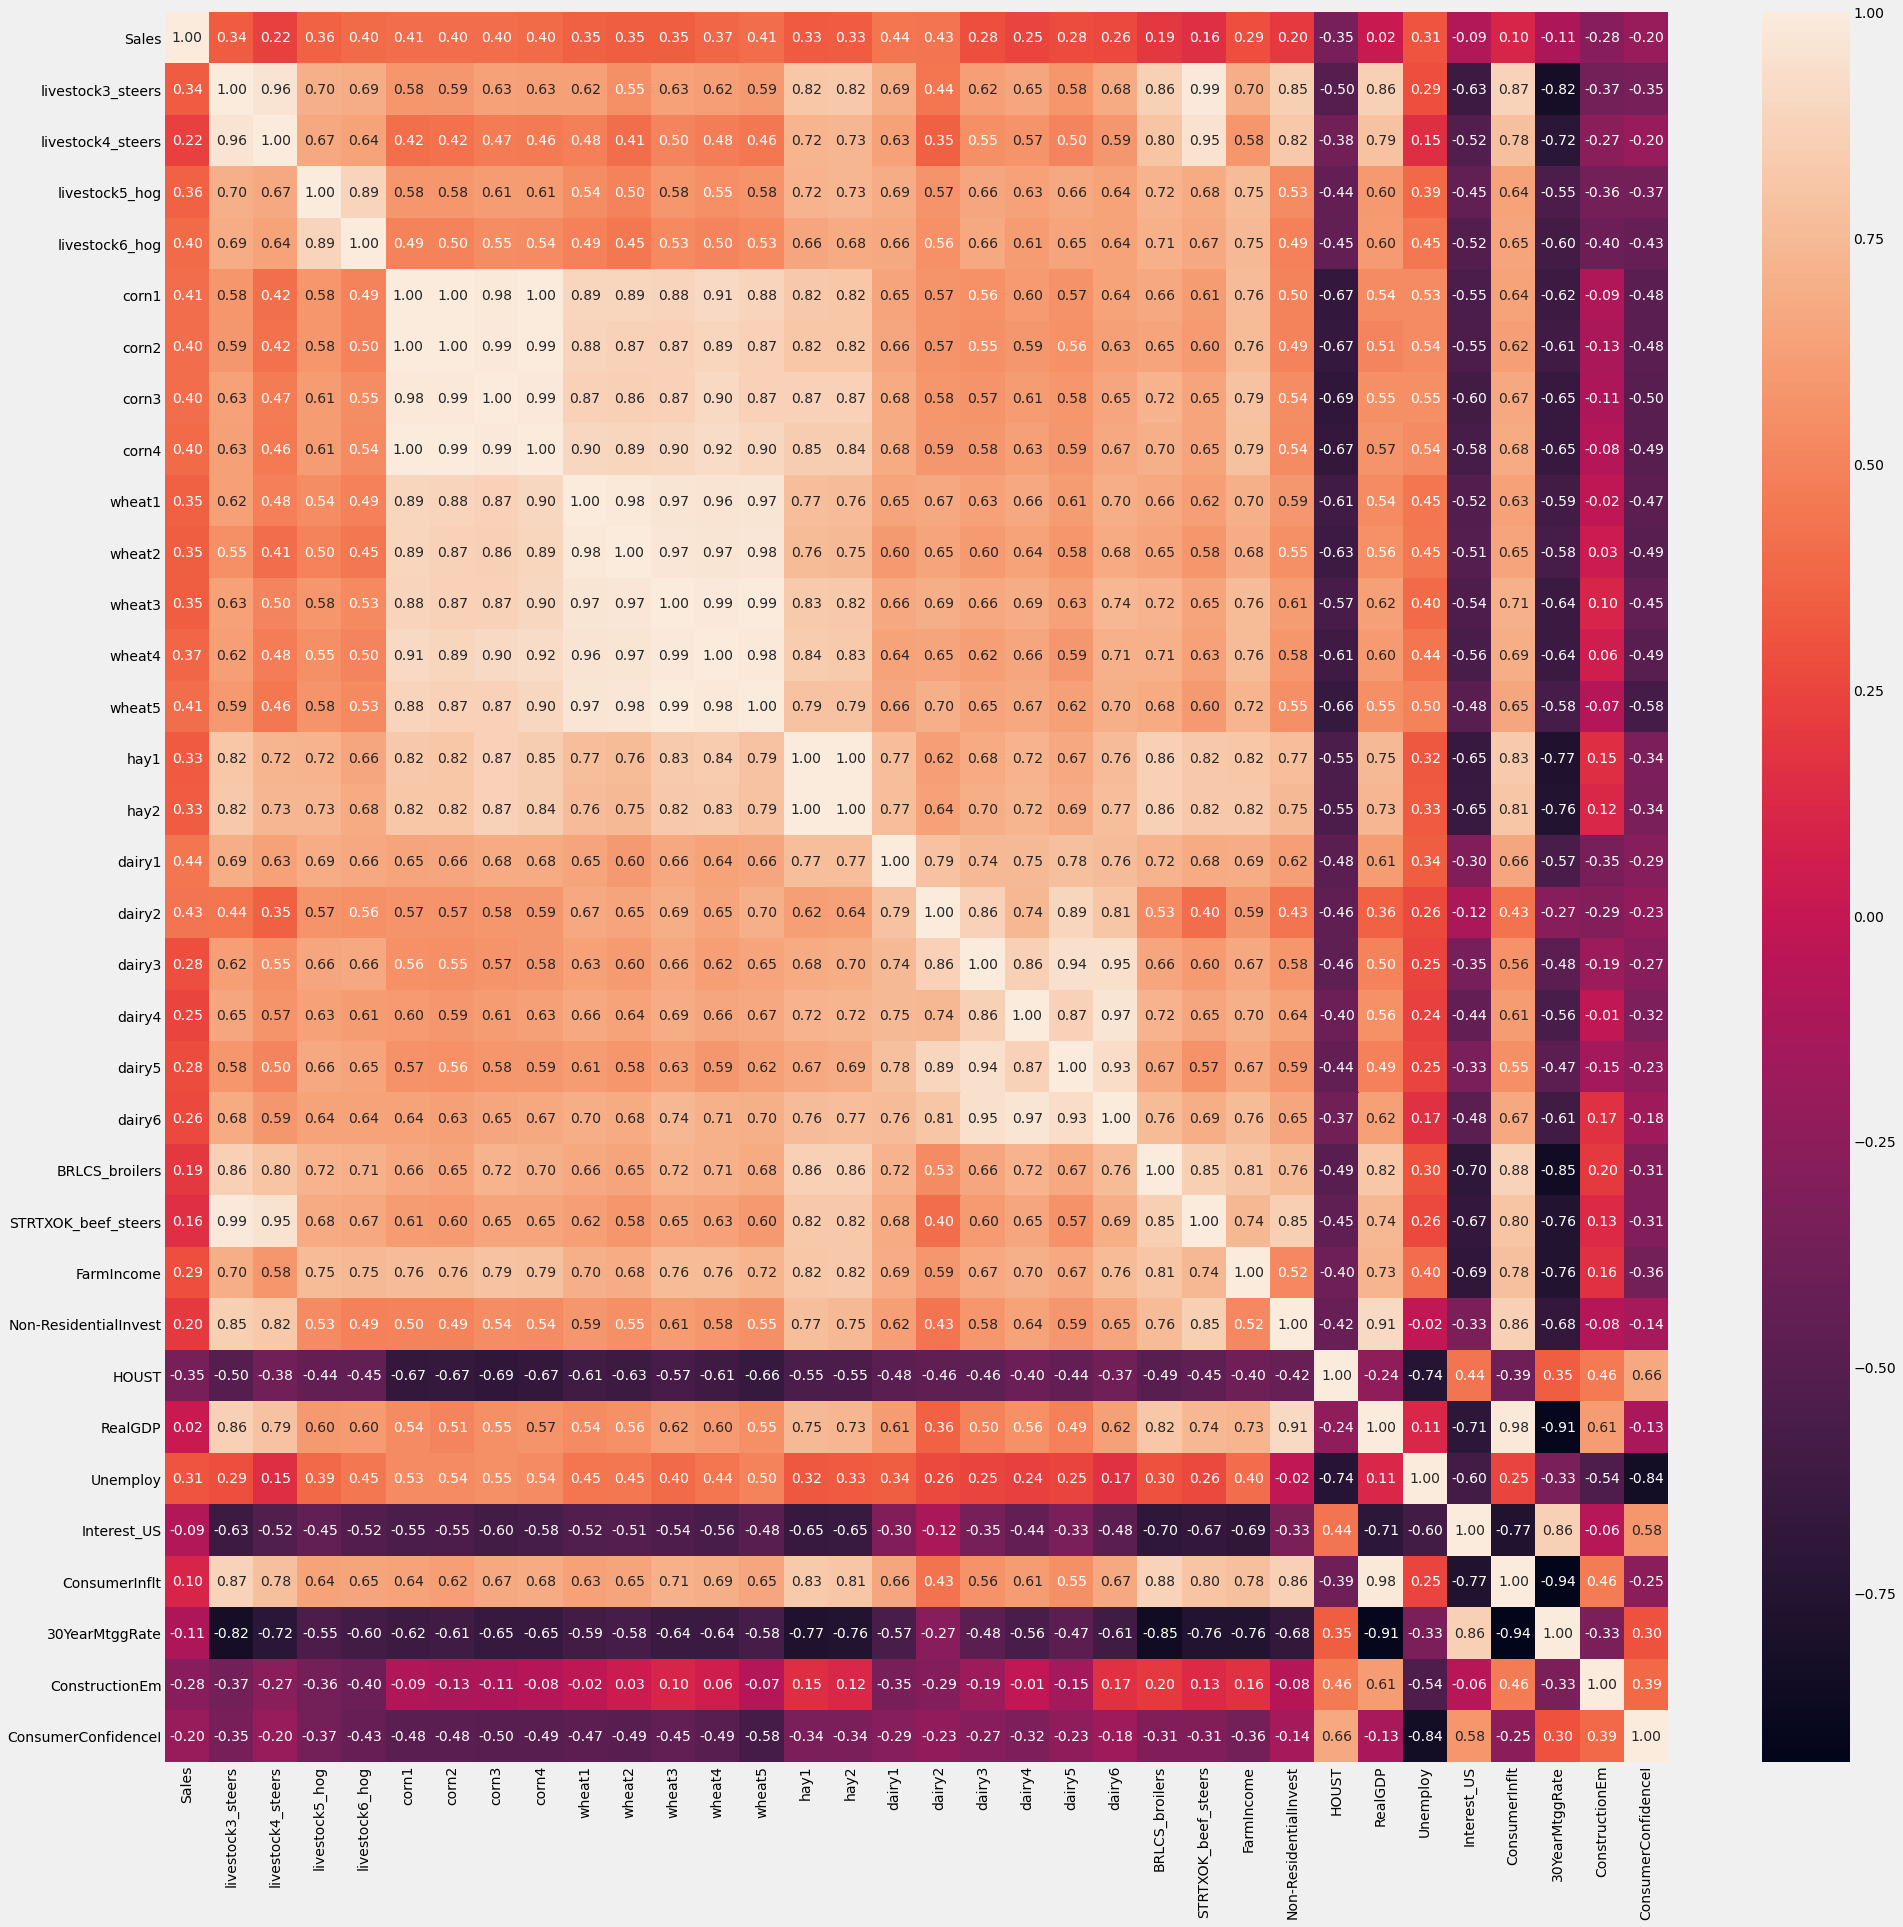

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,30))  
sns.heatmap(clean_combined_sales_ind.corr(),annot=True,fmt =".2f")

Observations from correlation map:
*   Some variables have perfect correlation between them which they might be duplicates or representing exaclty same information




In [62]:
# Columns with perfect correlation 
clean_combined_sales_ind.columns[(clean_combined_sales_ind.corr()==1).sum()>1]

Index(['livestock1_broilers', 'livestock2_beef_steers', 'BRLCS_broilers',
       'STRTXOK_beef_steers'],
      dtype='object')

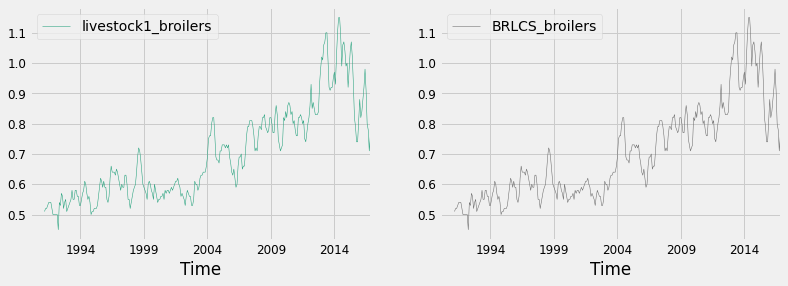

In [64]:
# Ploting livestock1_broilers and BRLCS_broilers
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock1_broilers","BRLCS_broilers"]].plot(subplots= True,linewidth=0.5,layout =(1,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(12,4),fontsize=12)
plt.show()

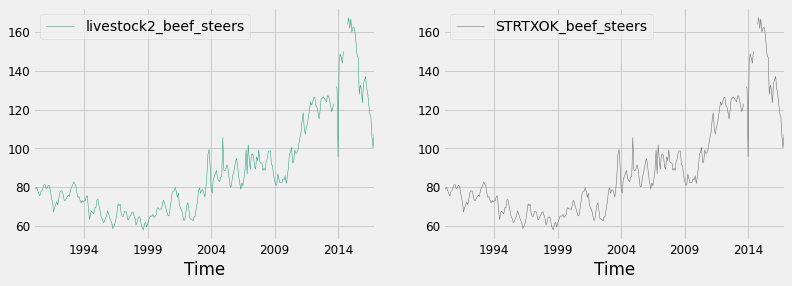

In [65]:
# Ploting livestock2_beef_steers and STRTXOK_beef_steers
plt.style.use("fivethirtyeight")
ax = clean_combined_sales_ind[["livestock2_beef_steers","STRTXOK_beef_steers"]].plot(subplots= True,linewidth=0.5,layout =(1,2),sharex=False,sharey=False,colormap = "Dark2", figsize=(12,4),fontsize=12)
plt.show()

In [66]:
# Dropping the livestock1_broilers and livestock2_beef_steers as these are duplicates for BRLCS_broilers & STRTXOK_beef_steers respectively
clean_combined_sales_ind = clean_combined_sales_ind.drop(columns=["livestock1_broilers","livestock2_beef_steers"],axis=1)


In [67]:
#Shape of clean_combined_sales_ind
clean_combined_sales_ind.shape

(324, 34)

**Missing Values Treatment:**



In [45]:
# Columns with atleast one missing value
miss_val_columns = clean_combined_sales_ind.loc[:,clean_combined_sales_ind.isnull().any()].columns
miss_val_columns

Index(['livestock1_broilers', 'livestock2_beef_steers', 'livestock3_steers',
       'livestock4_steers', 'livestock5_hog', 'livestock6_hog', 'wheat5',
       'dairy1', 'dairy2', 'dairy3', 'dairy4', 'dairy5', 'BRLCS_broilers',
       'STRTXOK_beef_steers', 'Non-ResidentialInvest'],
      dtype='object')

In [11]:
# Importing data table
%load_ext google.colab.data_table
from google.colab import data_table

In [12]:
# checking rows with missing values
clean_combined_sales_ind["sum"] = clean_combined_sales_ind.isnull().sum(axis=1)

In [14]:
# Looking at table with columns having missing values
miss_val_col_data = clean_combined_sales_ind[list(miss_val_columns)][clean_combined_sales_ind["sum"]>0]

# Visualising data table
data_table.DataTable(miss_val_col_data , include_index= True, num_rows_per_page=50)

,livestock1_broilers,livestock2_beef_steers,livestock3_steers,livestock4_steers,livestock5_hog,livestock6_hog,wheat5,dairy1,dairy2,dairy3,dairy4,dairy5,BRLCS_broilers,STRTXOK_beef_steers,Non-ResidentialInvest
Time,,,,,,,,,,,,,,,
1990-01-31,NaN,79.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.06,NaN
1990-02-28,NaN,79.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.04,NaN
1990-03-31,NaN,79.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.16,NaN
1990-04-30,NaN,79.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.89,NaN
1990-05-31,NaN,78.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-11-30,0.64,61.88,61.81,71.99,17.66,11.13,3.54,0.24,1.07,15.40,16.84,14.87,0.64,61.88,NaN
1998-12-31,0.60,59.44,59.36,73.33,19.95,7.80,3.44,0.24,1.09,16.34,17.34,13.44,0.60,59.44,NaN
2013-10-31,0.92,NaN,130.09,169.87,64.95,65.09,8.85,0.57,1.84,20.56,18.22,20.17,0.92,NaN,2076.3


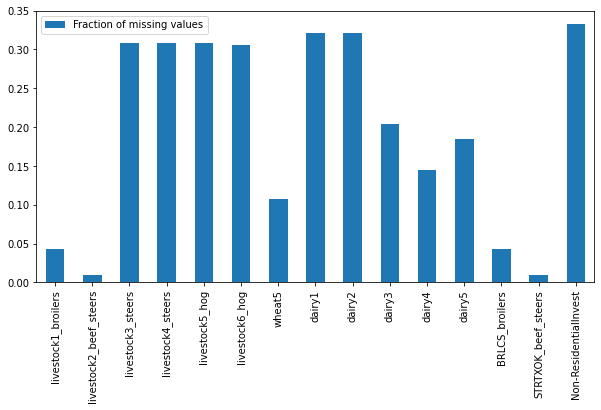

In [15]:
# visualising fraction of missing values with missing value columns

fract_miss_col = pd.DataFrame(clean_combined_sales_ind[list(miss_val_columns)].isnull().mean())
fract_miss_col.columns = ["Fraction of missing values"]

#Ploting fraction of missing values
fract_miss_col.plot.bar(figsize= (10,5))


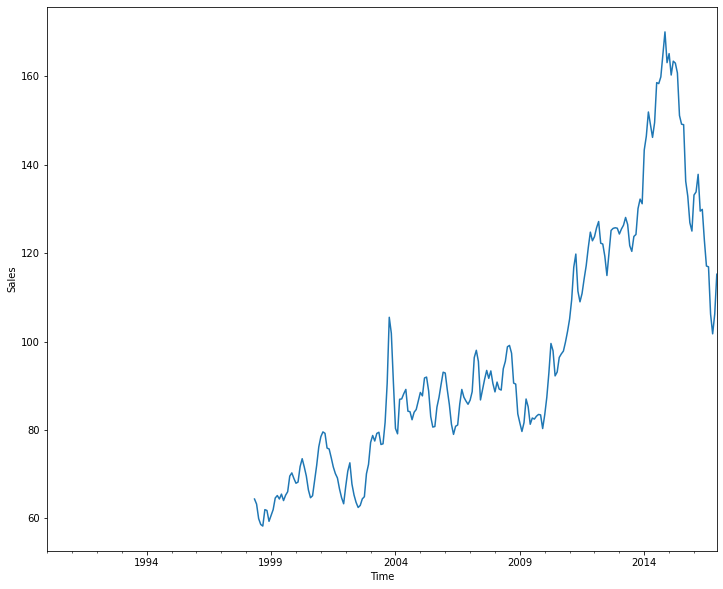

In [72]:
#line plot of time series
from matplotlib import pyplot
#dataset = pd.read_csv('D:\Data Science Projects\Time series forecasting\Arima Implementation\dataset1.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
dataset = clean_combined_sales_ind["livestock3_steers"]
pyplot.figure(figsize=(12,10))
pyplot.xlabel("Year")
pyplot.ylabel("Sales")
dataset.plot()
pyplot.show()